In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
files_with_attacks = {
    "Data_of_Attack_Back_Normal.csv": "Normal",
    "Data_of_Attack_Back.csv": "Back",
    "Data_of_Attack_Back_BufferOverflow.csv": "BufferOverflow",
    "Data_of_Attack_Back_FTPWrite.csv": "FTPWrite",
    "Data_of_Attack_Back_GuessPassword.csv": "GuessPassword",
    "Data_of_Attack_Back_Neptune.csv": "Neptune",
    "Data_of_Attack_Back_NMap.csv": "NMap",
    "Data_of_Attack_Back_PortSweep.csv": "PortSweep",
    "Data_of_Attack_Back_RootKit.csv": "RootKit",
    "Data_of_Attack_Back_Satan.csv": "Satan",
    "Data_of_Attack_Back_Smurf.csv": "Smurf"}

In [4]:
# Empty list to store the dataframes
dataframes = []

In [5]:
path ="D:\ALabs Assignments\ML\12. Capstone Case Study - Cyber Security Case Study"

In [6]:
import os
import pandas as pd

# Define the path
path = "D:\\ALabs Assignments\\ML\\12. Capstone Case Study - Cyber Security Case Study\\"

# Empty list to store the dataframes
dataframes = []

for file_name, attack_type in files_with_attacks.items():
    # Read the CSV file
    try:
        df = pd.read_csv(os.path.join(path, file_name))  # Using os.path.join to handle path separators
        df['attack'] = attack_type  # Add the 'attack' column with the corresponding attack type
        dataframes.append(df)  # Append the dataframe to the list
        print(f"Loaded {file_name} with attack type: {attack_type}")
    except FileNotFoundError:
        print(f"File {file_name} not found at path {path}")


Loaded Data_of_Attack_Back_Normal.csv with attack type: Normal
Loaded Data_of_Attack_Back.csv with attack type: Back
Loaded Data_of_Attack_Back_BufferOverflow.csv with attack type: BufferOverflow
Loaded Data_of_Attack_Back_FTPWrite.csv with attack type: FTPWrite
Loaded Data_of_Attack_Back_GuessPassword.csv with attack type: GuessPassword
Loaded Data_of_Attack_Back_Neptune.csv with attack type: Neptune
Loaded Data_of_Attack_Back_NMap.csv with attack type: NMap
Loaded Data_of_Attack_Back_PortSweep.csv with attack type: PortSweep
Loaded Data_of_Attack_Back_RootKit.csv with attack type: RootKit
Loaded Data_of_Attack_Back_Satan.csv with attack type: Satan
Loaded Data_of_Attack_Back_Smurf.csv with attack type: Smurf


In [7]:
attack_df = pd.concat(dataframes, ignore_index=True)

In [8]:
attack_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,0.001.2,0.001.3,0.1.5,0.21,0.1.6,0.22,0.23,0.24,0.25,0.26
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
attack_df.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'attack', '0.0026', ' 0', ' 0.07', ' 0.3',
       ' 0.00116', ' 0.00451', ' 0.4', ' 0.5', ' 0.6', ' 0.2', ' 0.7', ' 0.1',
       ' 0.8', ' 0.9

In [10]:
attack_df[['attack']]

,attack
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal
...,...
817545,Smurf
817546,Smurf
817547,Smurf
817548,Smurf


In [11]:
attack_df.shape

(817550, 83)

In [12]:
attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817550 entries, 0 to 817549
Data columns (total 83 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817543 non-null  float64
 1    protocol_type                817543 non-null  float64
 2    service                      817543 non-null  float64
 3    flag                         817543 non-null  float64
 4    src_bytes                    817543 non-null  float64
 5    dst_bytes                    817543 non-null  float64
 6    land                         817543 non-null  float64
 7    wrong_fragment               817543 non-null  float64
 8    urgent                       817543 non-null  float64
 9    hot                          817543 non-null  float64
 10   num_failed_logins            817543 non-null  float64
 11   logged_in                    817543 non-null  float64
 12   num_compromised              817543 non-nul

In [13]:
cols_to_drop = attack_df.columns[42:83]

In [14]:
attack_df = attack_df.drop(columns=cols_to_drop)

In [15]:
attack_df.isnull().sum()

duration                        7
 protocol_type                  7
 service                        7
 flag                           7
 src_bytes                      7
 dst_bytes                      7
 land                           7
 wrong_fragment                 7
 urgent                         7
 hot                            7
 num_failed_logins              7
 logged_in                      7
 num_compromised                7
 root_shell                     7
 su_attempted                   7
 num_root                       7
 num_file_creations             7
 num_shells                     7
 num_access_files               7
 num_outbound_cmds              7
 is_host_login                  7
 is_guest_login                 7
 count                          7
 srv_count                      7
 serror_rate                    7
 srv_error_rate                 7
 rerror_rate                    7
 srv_rerror_rate                7
 same_srv_rate                  7
 diff_srv_rate

In [16]:
attack_df = attack_df.dropna()

In [17]:
attack_df.isnull().sum()

duration                        0
 protocol_type                  0
 service                        0
 flag                           0
 src_bytes                      0
 dst_bytes                      0
 land                           0
 wrong_fragment                 0
 urgent                         0
 hot                            0
 num_failed_logins              0
 logged_in                      0
 num_compromised                0
 root_shell                     0
 su_attempted                   0
 num_root                       0
 num_file_creations             0
 num_shells                     0
 num_access_files               0
 num_outbound_cmds              0
 is_host_login                  0
 is_guest_login                 0
 count                          0
 srv_count                      0
 serror_rate                    0
 srv_error_rate                 0
 rerror_rate                    0
 srv_rerror_rate                0
 same_srv_rate                  0
 diff_srv_rate

In [18]:
attack_df.shape

(817543, 42)

In [19]:
attack_df.dtypes

duration                        float64
 protocol_type                  float64
 service                        float64
 flag                           float64
 src_bytes                      float64
 dst_bytes                      float64
 land                           float64
 wrong_fragment                 float64
 urgent                         float64
 hot                            float64
 num_failed_logins              float64
 logged_in                      float64
 num_compromised                float64
 root_shell                     float64
 su_attempted                   float64
 num_root                       float64
 num_file_creations             float64
 num_shells                     float64
 num_access_files               float64
 num_outbound_cmds              float64
 is_host_login                  float64
 is_guest_login                 float64
 count                          float64
 srv_count                      float64
 serror_rate                    float64


In [20]:
attack_df.columns = attack_df.columns.str.strip()

In [21]:
attack_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

In [22]:
attack_df.loc[:,:"hot"].head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0.0,0.0,0.0,0.0


In [23]:
attack_df.loc[:,'num_failed_logins':"num_shells"].head()

,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells
0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
attack_df.loc[:,'num_access_files':"diff_srv_rate"].head()

,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate
0,0.0,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0
1,0.0,0.0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0
2,0.0,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0
3,0.0,0.0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0
4,0.0,0.0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0


In [25]:
attack_df.loc[:,'srv_diff_host_rate':"dst_host_srv_diff_host_rate"].head()

,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0.0,0.000,0.000,0.0,0.0,0.000,0.0
1,0.0,0.001,0.001,0.1,0.0,0.100,0.0
2,0.0,0.002,0.002,0.1,0.0,0.050,0.0
3,0.0,0.003,0.003,0.1,0.0,0.033,0.0
4,0.0,0.004,0.004,0.1,0.0,0.025,0.0


In [26]:
attack_df.loc[:,'dst_host_serror_rate':"attack"].sample(5)

,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
98771,0.0,0.0,0.0,0.0,Normal
769523,0.1,0.1,0.0,0.0,Neptune
382943,0.0,0.0,0.1,0.1,Normal
533953,0.0,0.0,0.0,0.0,Normal
43765,0.0,0.0,0.0,0.0,Normal


In [27]:
attack_df["attack"].unique()

array(['Normal', 'Back', 'BufferOverflow', 'GuessPassword', 'Neptune',
       'NMap', 'PortSweep', 'RootKit', 'Satan', 'Smurf'], dtype=object)

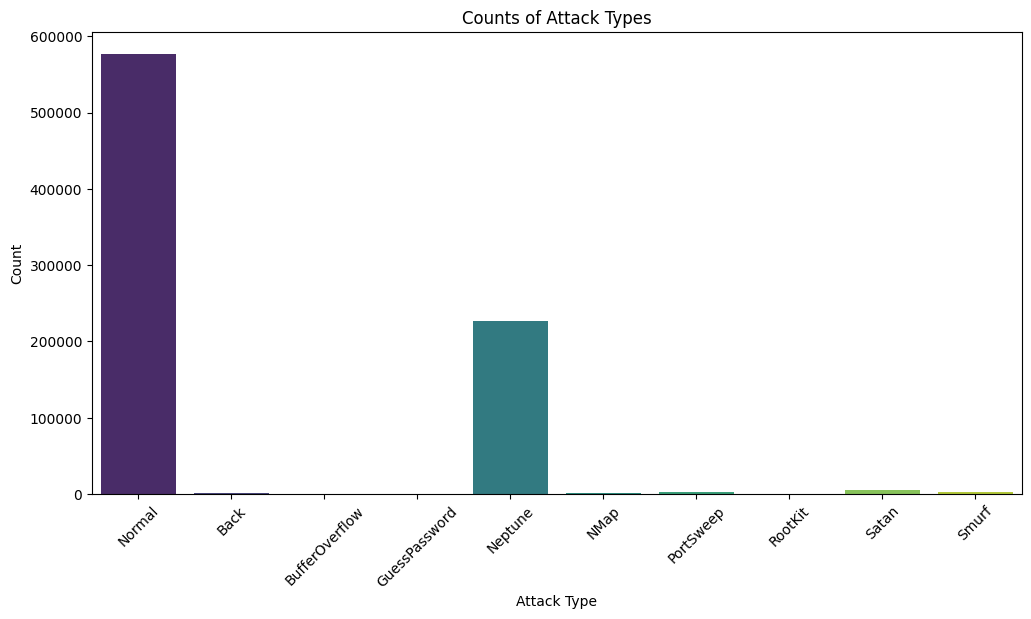

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x='attack', data=attack_df, palette='viridis')

plt.title('Counts of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [29]:
attack_df['flag'].unique()

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1 , 0.09])

In [30]:
#Set a threshold to convert values to 0 and 1

threshold = 0.05
attack_df['flag'] = attack_df['flag'].apply(lambda x: 0 if x < threshold else 1)

In [31]:
#Set a threshold to convert values to 0 and 1

threshold = 0.05
attack_df['flag'] = attack_df['flag'].apply(lambda x: 0 if x < threshold else 1)

C:\Users\sapna\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


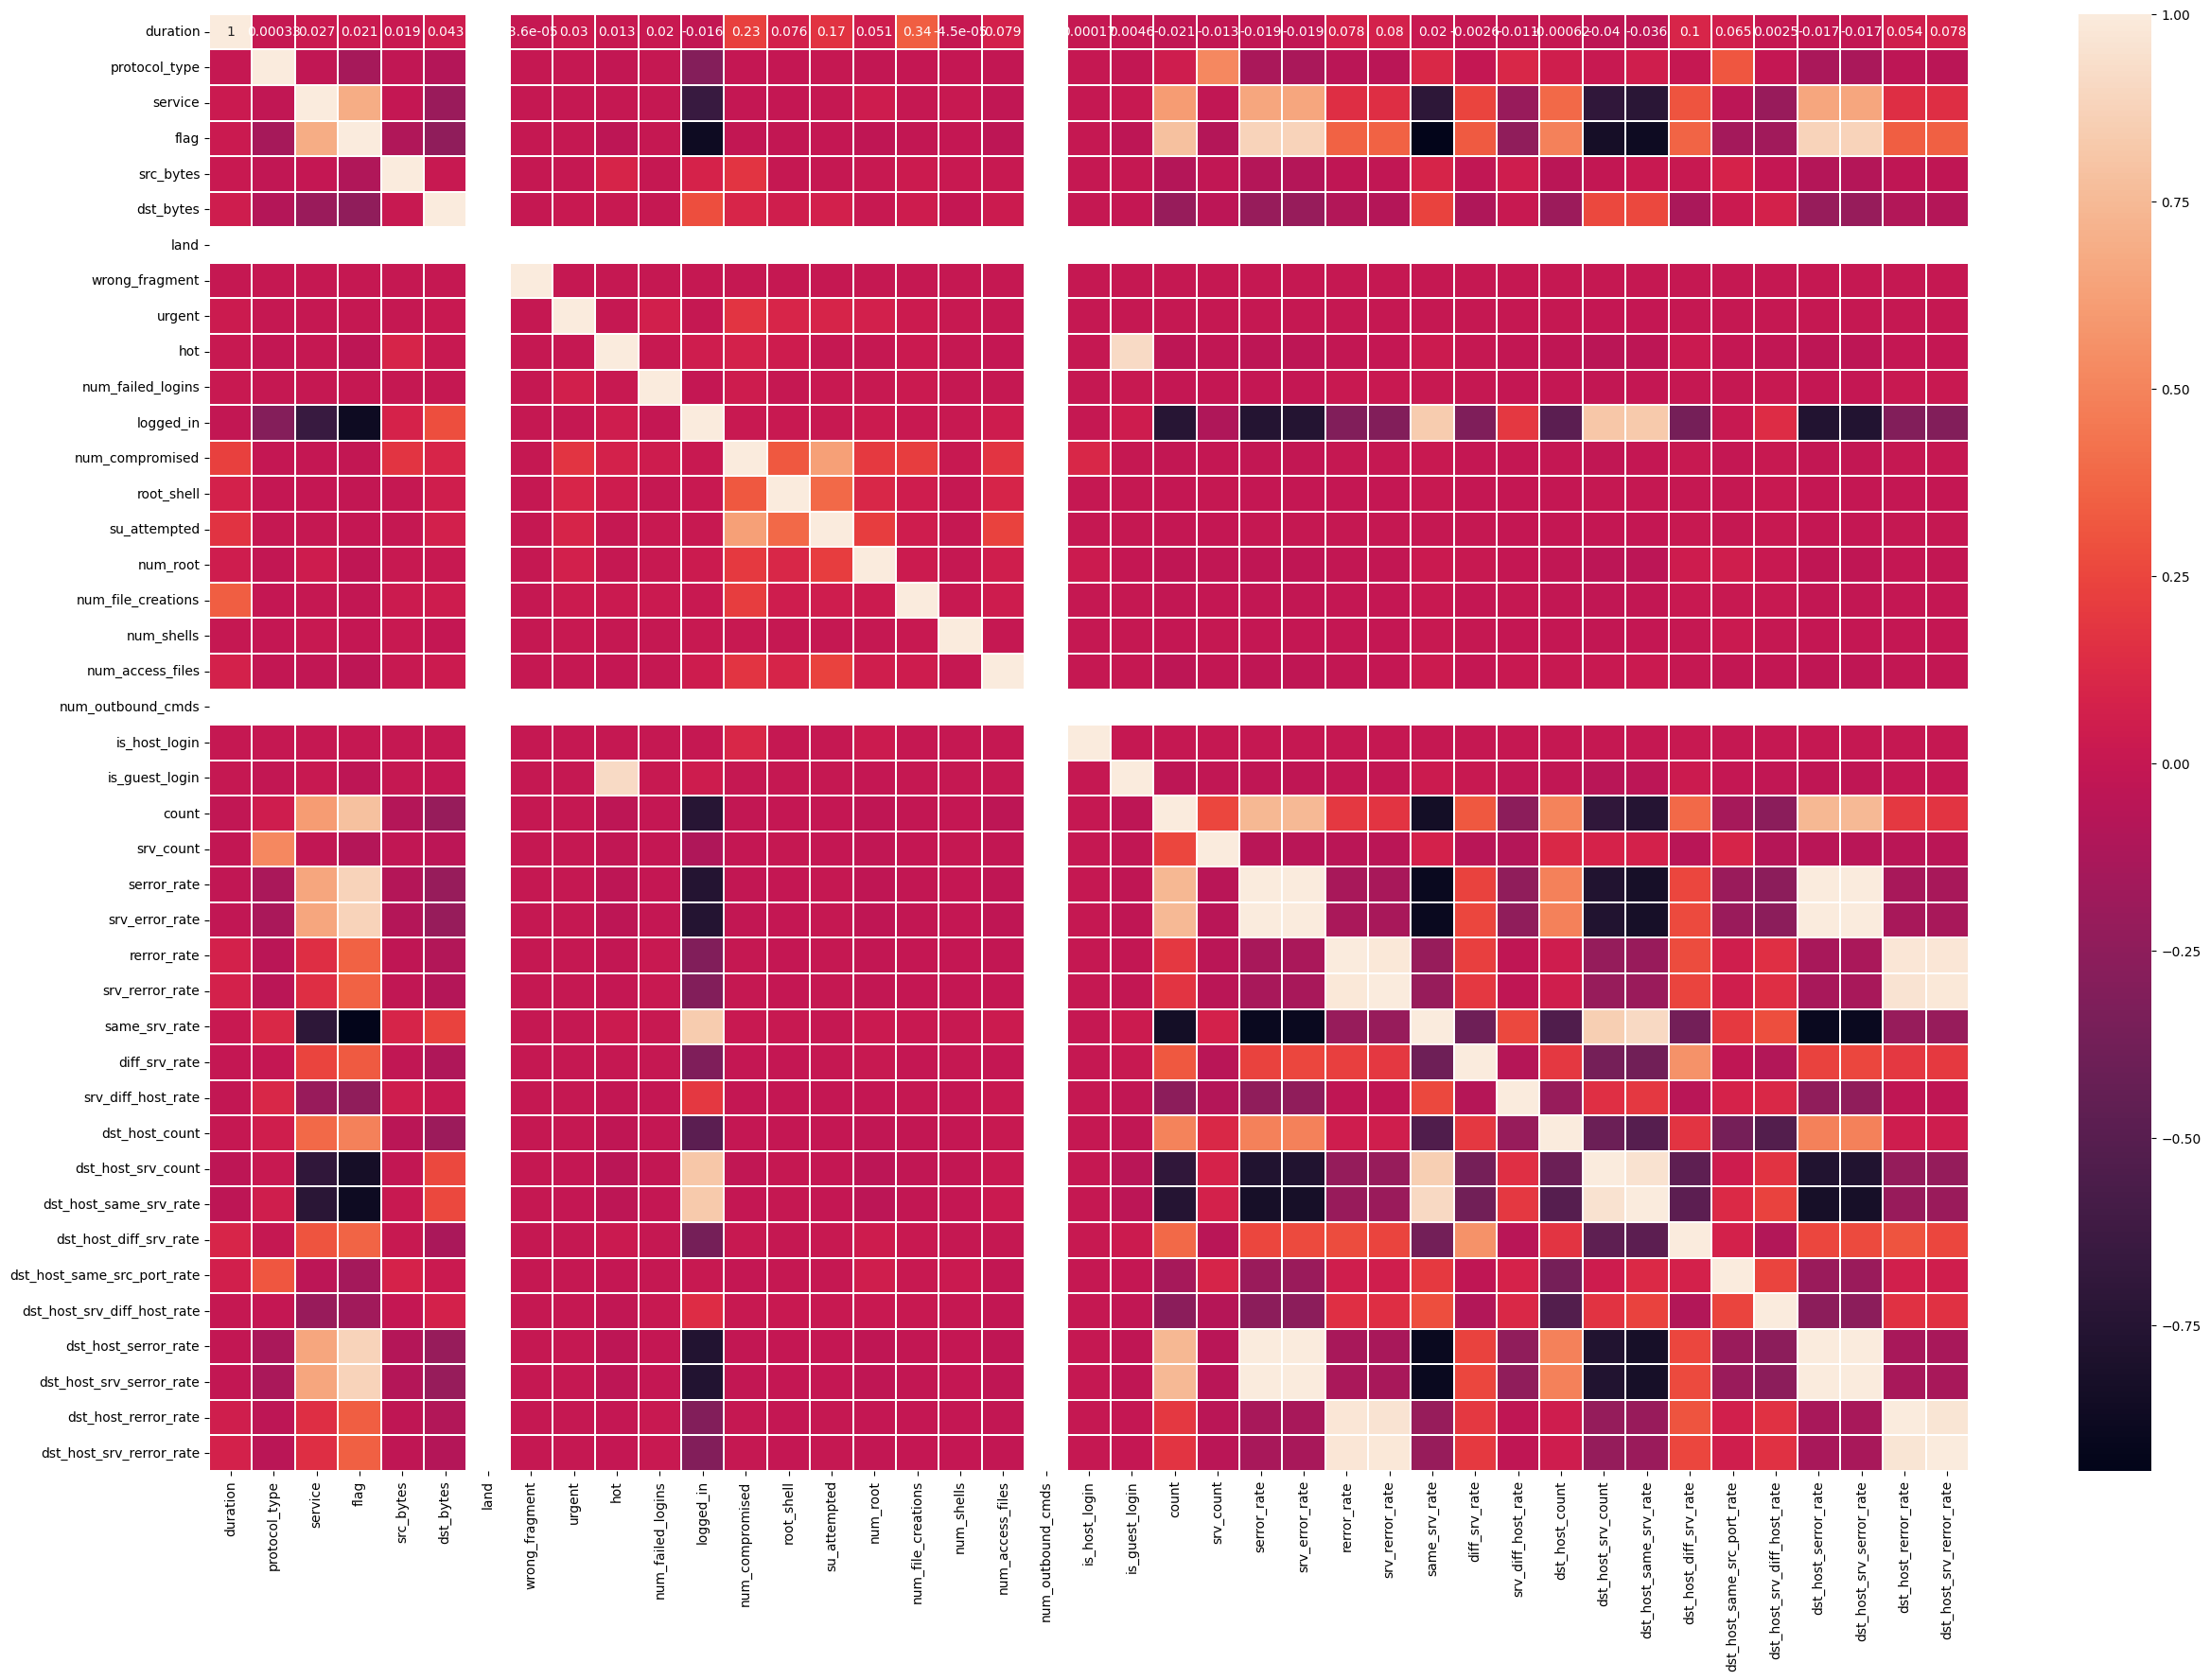

In [32]:
attack_df_num = attack_df.drop(columns=['attack'])

plt.figure(figsize = (30,20))
sns.heatmap(attack_df_num.corr(), annot = True, linewidths = 0.1)
plt.show()

## BINOMIAL CLASSIFICATION

In [34]:
attack_df['attack_binary'] = attack_df['attack'].apply(lambda x: 0 if x == 'Normal' else 1)

In [35]:
attack_df['attack_binary'].unique()

array([0, 1], dtype=int64)

## Train Test Split

In [37]:
X = attack_df.drop(columns=['attack', 'attack_binary']) 
y = attack_df['attack_binary']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Logistic Regression

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
model = LogisticRegression()

In [42]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [44]:
# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

Accuracy: 0.9977330457508878
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    173058
           1       1.00      1.00      1.00     72205

    accuracy                           1.00    245263
   macro avg       1.00      1.00      1.00    245263
weighted avg       1.00      1.00      1.00    245263

Confusion Matrix:
 [[172831    227]
 [   329  71876]]


In [45]:
cm = confusion_matrix(y_test, y_pred)

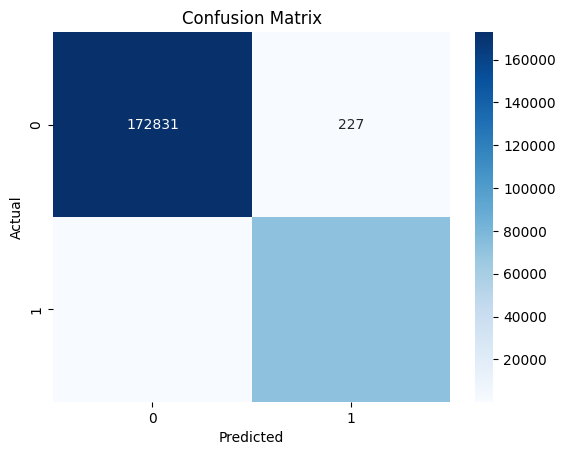

In [46]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

In [48]:
model = RandomForestClassifier()

In [49]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [51]:
# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

Accuracy: 0.9999143776272817
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    173058
           1       1.00      1.00      1.00     72205

    accuracy                           1.00    245263
   macro avg       1.00      1.00      1.00    245263
weighted avg       1.00      1.00      1.00    245263

Confusion Matrix:
 [[173057      1]
 [    20  72185]]


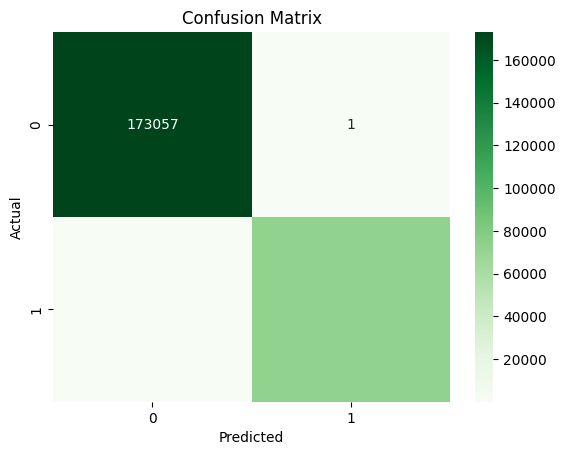

In [52]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Support Vector Machine (SVM)

In [54]:
model = SVC()

In [55]:
# Train the model
model.fit(X_train, y_train)

SVC()

In [56]:
# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

Accuracy: 0.9999143776272817
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    173058
           1       1.00      1.00      1.00     72205

    accuracy                           1.00    245263
   macro avg       1.00      1.00      1.00    245263
weighted avg       1.00      1.00      1.00    245263

Confusion Matrix:
 [[173057      1]
 [    20  72185]]


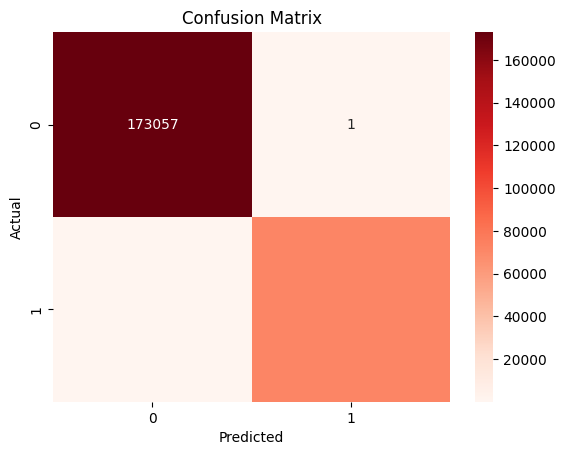

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## MULTINOMIAL CLASSIFICATION

In [59]:
attack_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack',
       'attack_binary'],
      dtype='object')

In [60]:
attack_df = attack_df.drop(columns = "attack_binary")

## Label Encoder

In [62]:
le = LabelEncoder()

In [63]:
attack_df['attack_encoded'] = le.fit_transform(attack_df['attack'])

In [64]:
attack_df['attack_encoded'].unique()

array([5, 0, 1, 2, 4, 3, 6, 7, 8, 9])

## Train - Test Split

In [66]:
X = attack_df.drop(columns=['attack', 'attack_encoded'])  
y = attack_df['attack_encoded']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Standard Scaler

In [69]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest

In [71]:
model = RandomForestClassifier()

In [72]:
#Train the model

model.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
#Make predictions on the test set

y_pred = model.predict(X_test)

In [74]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9998899140922194
Classification Report:
                 precision    recall  f1-score   support

          Back       1.00      1.00      1.00       268
BufferOverflow       1.00      0.89      0.94         9
 GuessPassword       1.00      1.00      1.00        13
          NMap       1.00      1.00      1.00       482
       Neptune       1.00      1.00      1.00     68089
        Normal       1.00      1.00      1.00    173058
     PortSweep       1.00      1.00      1.00       922
       RootKit       0.00      0.00      0.00         3
         Satan       1.00      0.99      1.00      1511
         Smurf       1.00      1.00      1.00       908

      accuracy                           1.00    245263
     macro avg       0.90      0.89      0.89    245263
  weighted avg       1.00      1.00      1.00    245263



C:\Users\sapna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sapna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sapna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [75]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

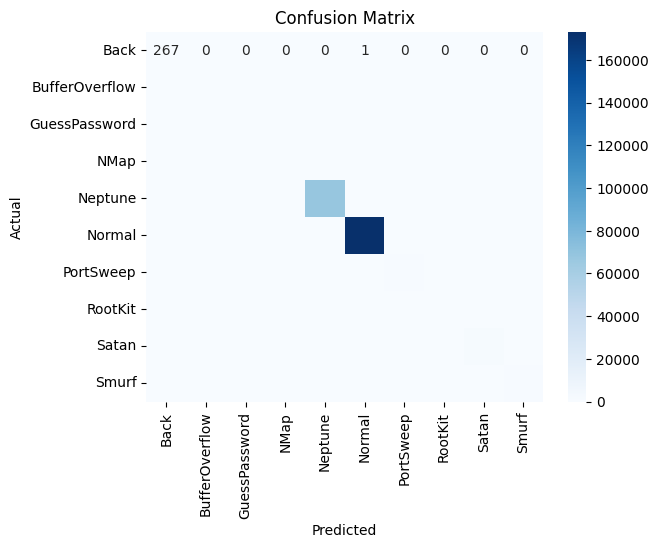

In [76]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Logistic Regression

In [78]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [79]:
#Train the model

model.fit(X_train, y_train)

C:\Users\sapna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\sapna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [80]:
#Make predictions on the test set

y_pred = model.predict(X_test)

In [81]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

C:\Users\sapna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9989806860390683
Classification Report:
                 precision    recall  f1-score   support

          Back       0.96      0.99      0.98       268
BufferOverflow       0.88      0.78      0.82         9
 GuessPassword       0.92      0.92      0.92        13
          NMap       0.96      0.80      0.87       482
       Neptune       1.00      1.00      1.00     68089
        Normal       1.00      1.00      1.00    173058
     PortSweep       0.98      0.98      0.98       922
       RootKit       0.00      0.00      0.00         3
         Satan       0.99      0.96      0.98      1511
         Smurf       0.99      0.98      0.99       908

      accuracy                           1.00    245263
     macro avg       0.87      0.84      0.85    245263
  weighted avg       1.00      1.00      1.00    245263



C:\Users\sapna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sapna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [82]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm

array([[   266,      0,      0,      0,      0,      2,      0,      0,
             0,      0],
       [     0,      7,      0,      0,      0,      2,      0,      0,
             0,      0],
       [     0,      0,     12,      0,      0,      1,      0,      0,
             0,      0],
       [     0,      0,      0,    387,      0,     94,      1,      0,
             0,      0],
       [     0,      0,      0,      0,  68085,      1,      3,      0,
             0,      0],
       [    10,      1,      1,     15,      3, 173003,     11,      0,
             8,      6],
       [     0,      0,      0,      1,      0,     12,    905,      0,
             4,      0],
       [     0,      0,      0,      0,      0,      3,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,     51,      5,      0,
          1455,      0],
       [     0,      0,      0,      0,      0,     15,      0,      0,
             0,    893]], dtype=int64)

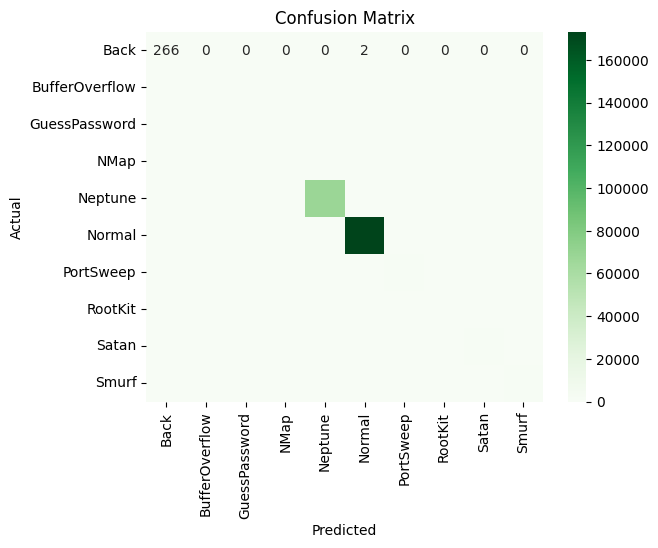

In [83]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Support Vector Machine

In [85]:
model = SVC(decision_function_shape='ovo')

In [86]:
#Train the model

model.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [87]:
#Make predictions on the test set

y_pred = model.predict(X_test)

In [88]:
#Make predictions on the test set

y_pred = model.predict(X_test)

In [89]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm

array([[   267,      0,      0,      0,      0,      1,      0,      0,
             0,      0],
       [     0,      4,      0,      0,      0,      5,      0,      0,
             0,      0],
       [     0,      0,     13,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,    444,      0,     38,      0,      0,
             0,      0],
       [     0,      0,      0,      0,  68085,      3,      1,      0,
             0,      0],
       [     0,      0,      0,      2,      0, 173047,      7,      0,
             2,      0],
       [     0,      0,      0,      0,      1,      5,    915,      0,
             1,      0],
       [     0,      0,      0,      0,      0,      3,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,     42,      4,      0,
          1465,      0],
       [     0,      0,      0,      0,      0,     24,      0,      0,
             0,    884]], dtype=int64)

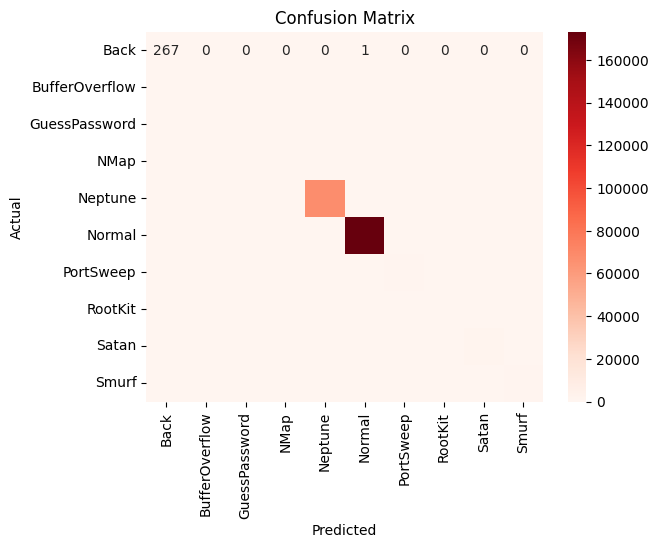

In [90]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()